# PB-POMIS: Hyperparameter Tuning

In [162]:
import baselines.common.notebook_utils as nu
import pandas as pd
import matplotlib.pyplot as plt
import glob
from importlib import reload
reload(nu)

<module 'baselines.common.notebook_utils' from '/home/matteo/baselines/baselines/common/notebook_utils.py'>

In [163]:
plt.close('all')

In [164]:
seeds = [10, 109, 904, 160, 570]

In [165]:
path = '../results/pbpomis_grid/pbpomis_grid'

## Cartpole

### Single IS (capacity = 1), self-normalized

In [166]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*cap=1_*delta=%.4f*' % delta) for delta in deltas}

In [167]:
candidates_IS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.2000: 2817.027048 ± 1166.844912	[1368.197729, 4265.856367]	 total horizon: 141286
delta=0.4000: 2155.553292 ± 1611.344763	[154.804511, 4156.302073]	 total horizon: 108195
delta=0.6000: 2674.285447 ± 1679.712500	[588.646908, 4759.923985]	 total horizon: 134111
delta=0.8000: 1817.463595 ± 1885.720352	[-523.967477, 4158.894667]	 total horizon: 91286
delta=0.9000: 2480.159443 ± 2246.190670	[-308.854645, 5269.173532]	 total horizon: 124324


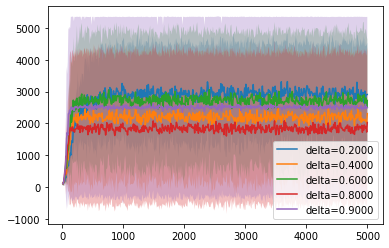

In [168]:
f = nu.compare(candidates_IS)

### MULTIPLE IS (capacity = 10), row-normalized

In [169]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=rows*cap=10_*delta=%.4f*' % delta) for delta in deltas}

In [170]:
candidates_MIS = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.2000: 4582.480595 ± 392.008691	[4095.737516, 5069.223674]	 total horizon: 229247
delta=0.4000: 3044.871606 ± 1698.160981	[936.326253, 5153.416960]	 total horizon: 152564
delta=0.6000: 3691.975173 ± 1516.980198	[1808.395476, 5575.554871]	 total horizon: 184832
delta=0.8000: 4149.078170 ± 1497.711034	[2289.424299, 6008.732041]	 total horizon: 207585
delta=0.9000: 3238.276089 ± 2161.889343	[553.935924, 5922.616254]	 total horizon: 162139


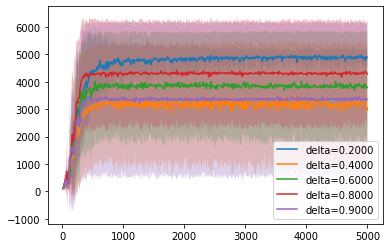

In [171]:
f = nu.compare(candidates_MIS)

### MULTIPLE IS (capacity = 10), all-normalized

In [172]:
deltas = [0.2, 0.4, 0.6, 0.8, 0.9]
files = {delta : glob.glob(path + '*env=RLLAB.CARTPOLE*norm=all*cap=10_*delta=%.4f*' % delta) for delta in deltas}

In [173]:
candidates_NORM = {'delta=%.4f' % delta : [nu.read_data(logfile) for logfile in files[delta]] for delta in deltas}

delta=0.2000: 2590.600694 ± 1999.099642	[108.390640, 5072.810748]	 total horizon: 129868
delta=0.4000: 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040
delta=0.6000: 2757.050138 ± 2039.736602	[224.382633, 5289.717643]	 total horizon: 138173
delta=0.8000: 2494.682338 ± 2159.117756	[-186.216448, 5175.581124]	 total horizon: 125057
delta=0.9000: 1054.168731 ± 628.806679	[273.402117, 1834.935346]	 total horizon: 53223


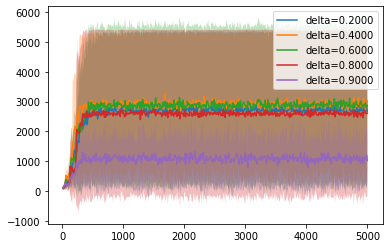

In [174]:
f = nu.compare(candidates_NORM)

### Compare Normalization

multi (delta = 0.2): 4582.480595 ± 392.008691	[4095.737516, 5069.223674]	 total horizon: 229247
multi (normalize all, delta = 0.4): 2814.331887 ± 1845.838116	[522.421151, 5106.242622]	 total horizon: 141040


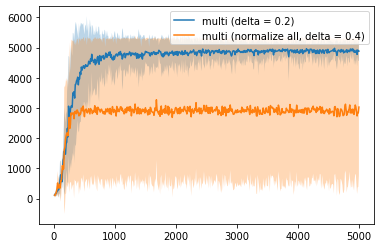

In [175]:
f = nu.compare({ 'multi (delta = 0.2)': candidates_MIS['delta=0.2000'],
                'multi (normalize all, delta = 0.4)': candidates_NORM['delta=0.4000']})

single (delta = 0.2): 2817.027048 ± 1166.844912	[1368.197729, 4265.856367]	 total horizon: 141286
multi (delta = 0.2): 2590.600694 ± 1999.099642	[108.390640, 5072.810748]	 total horizon: 129868


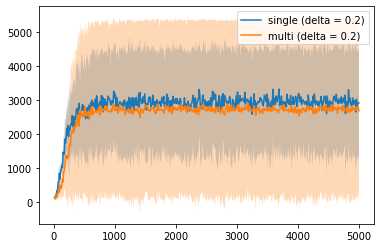

In [161]:
f = nu.compare({'single (delta = 0.2)' : candidates_IS['delta=0.2000'], 
                'multi (delta = 0.2)': candidates_MIS['delta=0.2000']})